# Random Walk

In [3]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Random walk in one dimension 

####  Direct Implementation

In [8]:
'''X stores 1-D coordinate'''
X = []
'''T stores time coordinate'''
T = []
'''starting point'''
x = 0
'''length of each step'''
d = 1

'''iteratefor N steps'''
for t in range(100):
    
    '''Walk one step ahead'''
    x = x + d*random.choice([-1,1])
    
    '''collect time'''
    T.append(t)
    '''collect position'''
    X.append(x)

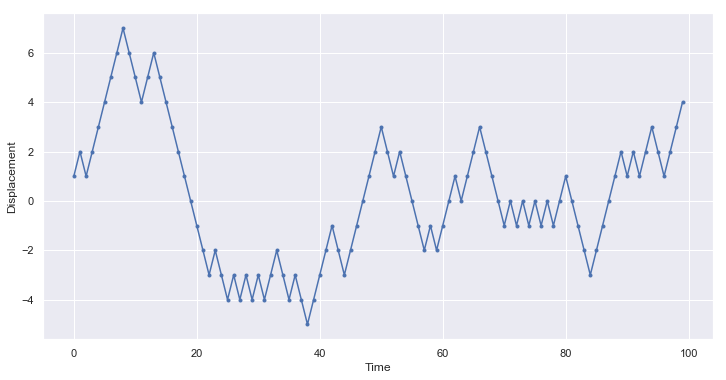

In [12]:
'''Make a plot'''    
plt.figure(figsize = [12,6])
plt.scatter(T,X,marker = '.')
plt.plot(T,X)
plt.xlabel("Time")
plt.ylabel('Displacement')
plt.grid(True)
plt.show()

### Implement with function

In [13]:
def walk1D(x,N,d):
    
    '''This function returns the space 'X' and time 'T' for random walk in 1D
       x: initial position
       N: total number of steps
       d: step length'''
    
    
    '''X stores 1-D coordinate'''
    X = []
    '''T stores time coordinate'''
    T = []
    
    
    '''iteratefor N steps'''
    for t in range(N):

        '''Walk one step ahead'''
        x = x + d*random.choice([-1,1])

        '''collect time'''
        T.append(t)
        '''collect position'''
        X.append(x)
        
    return X,T

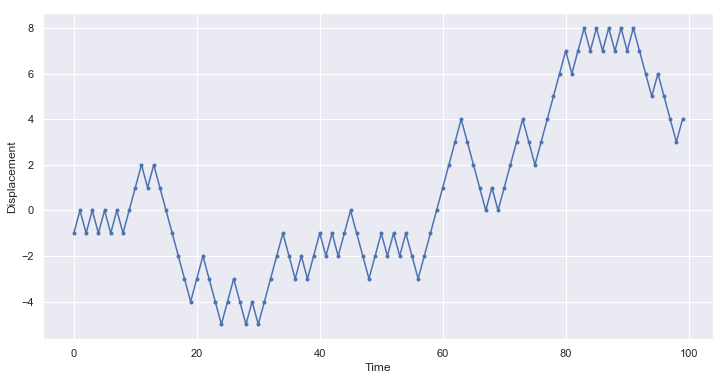

In [14]:
'''Implement function to get data'''
X,T = walk1D(x=0,N=100,d=1)
'''Make a plot''' 
plt.figure(figsize = [12,6])
plt.scatter(T,X,marker = '.')
plt.plot(T,X)
plt.xlabel("Time")
plt.ylabel('Displacement')
plt.grid(True)
plt.show()

###  Object Oriented Programming

In [24]:
class Walker1D(object):

    ''' 
     This is a class to create on dimentional walk:
      x0 : initial position
      d  : step size 
      N :  number of steps in random walk 
    '''

    def __init__(self,N,d,x0):
        self.N = N
        self.X = []
        self.d = d
        self.x0 = x0
        

    def walk1D(self):
        '''note initial position'''
        x = self.x0
        
        k = 0
        while k < self.N:
            '''Walk one step ahead'''
            x = x + self.d*random.choice([-1,1])
            '''collect position'''
            self.X.append(x)
            k = k+1
            
            
        return self.X


####  Let's generate 4 different random walks of step 1000 each

In [25]:
X1 = Walker1D(N =1000,d = 1,x0=0).walk1D()
X2 = Walker1D(N =1000,d = 1,x0=0).walk1D()
X3= Walker1D(N =1000,d = 1,x0=0).walk1D()
X4 = Walker1D(N =1000,d = 1,x0=0).walk1D()
T = [i for i in range(len(X1))]

In [41]:
import json
with open ('data/rwalk4.json', 'w')as f4:
    json.dump([X1,X2,X3,X4,T],f4)

####  Let's visualize them

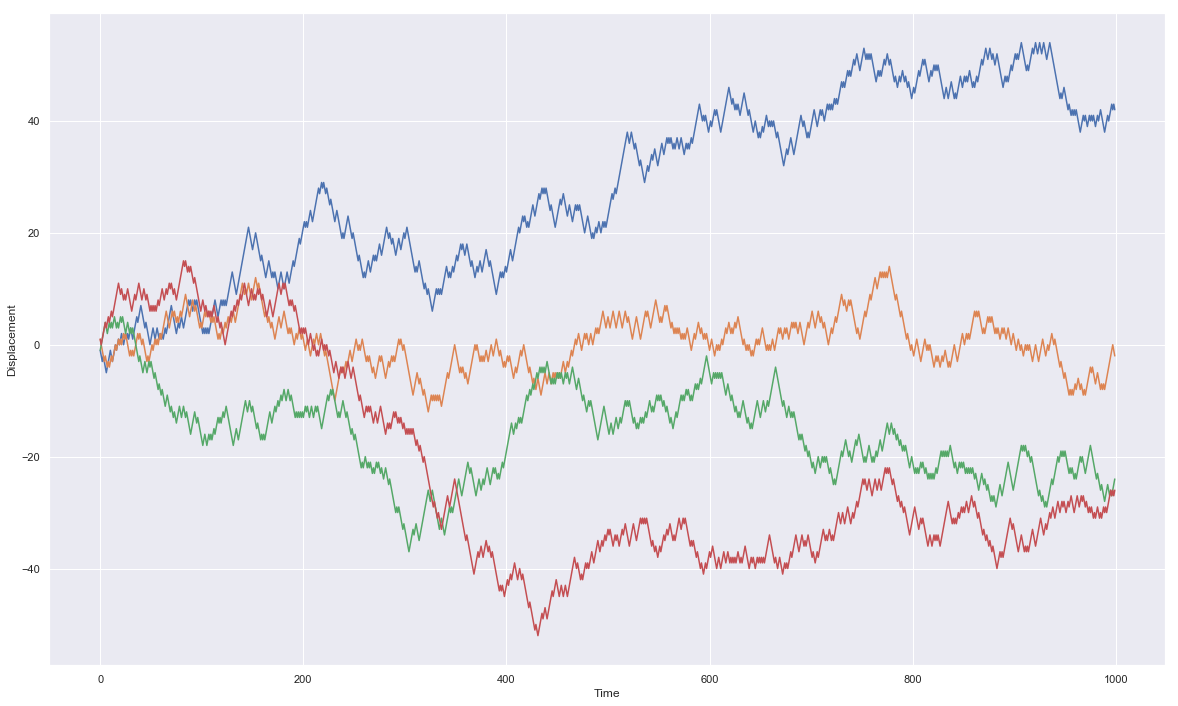

In [26]:
plt.figure(figsize = [20,12])
plt.plot(T,X1)
plt.plot(T,X2)
plt.plot(T,X3)
plt.plot(T,X4)
plt.xlabel("Time")
plt.ylabel('Displacement')
plt.grid(True)
plt.savefig('plot/rwalk4.pdf') 
plt.show()

###  Random Walk in 2D

#####  Create a function to walk a single step

In [32]:
def move2D(xi,yi):
    '''
    This function choose a direction and walk one step in 2D
    '''
    direction =  random.choice(['x','y'])
    if direction == 'x':
        r = random.choice([-1,1])
        if r ==1:xf = xi+1
        else: xf = xi -1
        yf = yi
    if direction == 'y':
        r = random.choice([-1,1])
        if r ==1:yf = yi+1
        else: yf = yi -1
        xf = xi
    return xf,yf

#####  Lets walk in 2D using above function

In [39]:
def walk2D(N,pos):
    '''
    This function walks N step in 2d implementing move2D
    '''
    
    '''coordinate collectors'''
    X =[] ; Y =[]
    
    '''from where to start'''
    x0 = pos[0] ; y0 = pos[0]
    
    k=0
    
    while k < N:
        
        '''move a step'''
        x,y = move2D(x0,y0)
        
        '''collect X coordinate'''
        X.append(x)
        
        '''collect Y coordinate'''
        Y.append(y)
        
        '''set previous position for next step'''
        x0 = x
        y0 = y
        
        k = k+1
        
    return X,Y

####  Lets create a 3 different Random walk in 2D

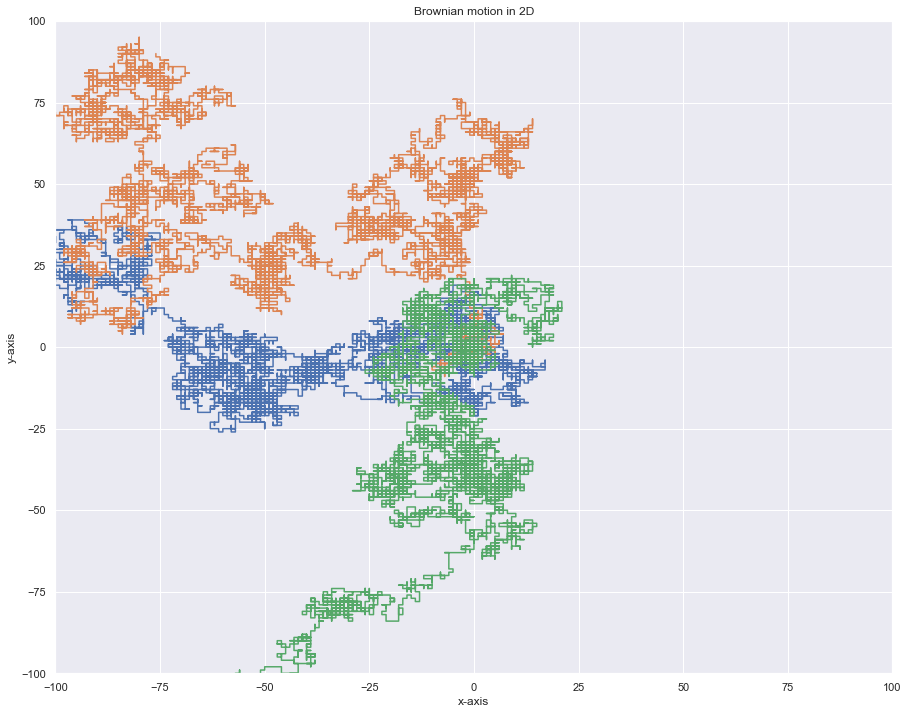

In [40]:
N = 10000
U = walk2D(N,[0,0])
V = walk2D(N,[0,0])
W = walk2D(N,[0,0])



with open ('data/rwalk4.json', 'w')as f:
    json.dump([U,V,W],f)


plt.figure(figsize = [15,12])

plt.plot(U[0],U[1],"-")
plt.plot(V[0],V[1],"-")
plt.plot(W[0],W[1],"-")
plt.axis([-100, 100, -100, 100])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.title("Brownian motion in 2D")
plt.savefig('plot/rwalk2D.pdf') 
plt.show()